# **SVM Classification  -  Iris Dataset**

## **Importing Libraries**

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

## **Load Iris Dataset**

In [2]:
newdata=load_iris(as_frame=True)
df=newdata.frame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## **Splitting the features & Target Variable**

In [3]:
x=df.drop('target',axis=1)
y=df['target']


## **Split into Train & Test Sets**

In [4]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [5]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

### **Create & Train the SVM Classifier**

In [6]:
model=SVC(kernel='rbf',C=1.0,gamma='scale')
model.fit(x_train,y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [7]:
y_pred=model.predict(x_test)

In [8]:
print("Training Accuracy :",model.score(x_train,y_train))
print("Test Accuracy :",model.score(x_test,y_test))

Training Accuracy : 0.9666666666666667
Test Accuracy : 1.0


In [9]:
scores=cross_val_score(model,x,y,cv=5)
print("Cross Value Score :",scores)
print("Average Accuracy :",scores.mean())

Cross Value Score : [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Average Accuracy : 0.9666666666666666


Cross-validation tests the model on different subsets of data multiple times.
If the accuracy stays consistent:

The model has learned general patterns rather than memorizing training data.

In your case, the model’s mean accuracy (≈96.7%) matches both your training (96.6%) and test (100%) accuracy → perfect alignment ✅

In [10]:
#Accuracy
print("Accuracy :",accuracy_score(y_test,y_pred))


Accuracy : 1.0


In [11]:
# Confusion Matrix
print("Confusion Matrix :\n",confusion_matrix(y_test,y_pred))


Confusion Matrix :
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [12]:
#Classification Report
print("Classification Report :\n",classification_report(y_test,y_pred,target_names=newdata.target_names))

Classification Report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
# Create a dataframe for Test results
test_results=pd.DataFrame(scaler.inverse_transform(x_test),columns=newdata.feature_names)
test_results['Actual_flower']=newdata.target_names[y_test]
test_results['Predicted_flower']=newdata.target_names[y_pred]

#View Rows
print(test_results)

    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 6.1               2.8                4.7               1.2   
1                 5.7               3.8                1.7               0.3   
2                 7.7               2.6                6.9               2.3   
3                 6.0               2.9                4.5               1.5   
4                 6.8               2.8                4.8               1.4   
5                 5.4               3.4                1.5               0.4   
6                 5.6               2.9                3.6               1.3   
7                 6.9               3.1                5.1               2.3   
8                 6.2               2.2                4.5               1.5   
9                 5.8               2.7                3.9               1.2   
10                6.5               3.2                5.1               2.0   
11                4.8               3.0 

## **Plotting 1**

#### **Take first two features: sepal length & sepal width**

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

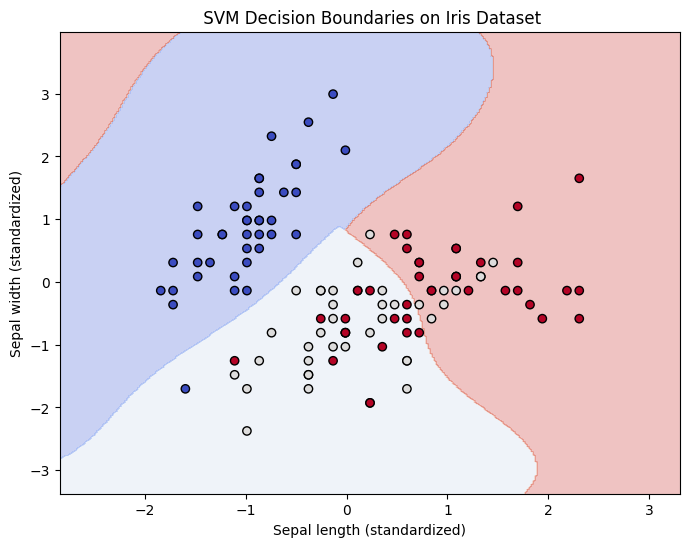

In [15]:
iris=load_iris()
x=iris.data[:, :2]
y=iris.target

# Split into Train & Test Sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Train SVM Model
model=SVC(kernel='rbf',C=1.0,gamma='scale')
model.fit(x_train,y_train)

# Create mesh grid for plotting decision regions
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each point in the grid
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# Plot decision boundary and data points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Sepal length (standardized)')
plt.ylabel('Sepal width (standardized)')
plt.title(' SVM Decision Boundaries on Iris Dataset')
plt.show()


## **Plotting 2**

#### **SVM Decision Boundaries using Petal Features**

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

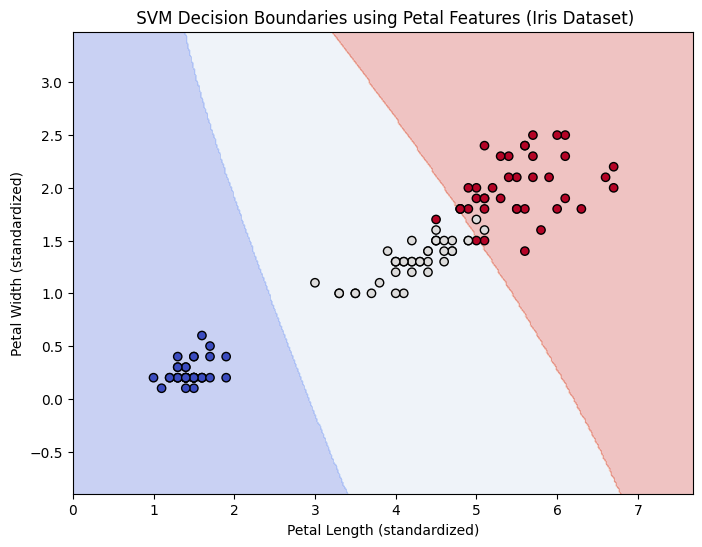

In [17]:
iris=load_iris()
X=iris.data[:, 2:4] # selecting petal length and petal width
y=iris.target

# Split into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# Train SVM model (RBF kernel)
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train, y_train)

# Create mesh grid for decision boundary visualization
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class for each grid point
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Petal Length (standardized)')
plt.ylabel('Petal Width (standardized)')
plt.title(' SVM Decision Boundaries using Petal Features (Iris Dataset)')
plt.show()


## **Plotting 3**

#### **3D Visualization of SVM Classification**

✅ Model accuracy on test data: 100.00%


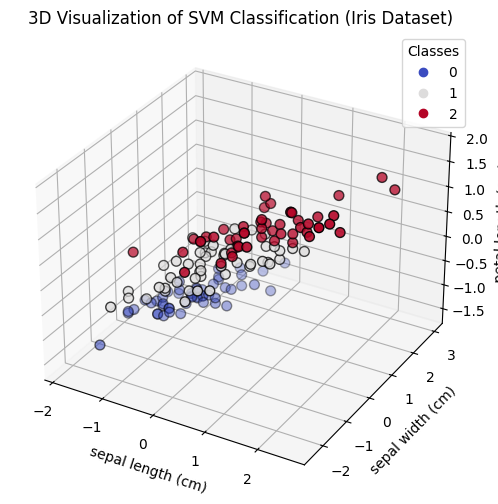

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an SVM classifier (using all 4 features)
svm_model = SVC(kernel='rbf', gamma=0.5, C=1)
svm_model.fit(X_train_scaled, y_train)

# Evaluate accuracy
accuracy = svm_model.score(X_test_scaled, y_test)
print(f"✅ Model accuracy on test data: {accuracy * 100:.2f}%")

# Select 3 features for visualization
x_index, y_index, z_index = 0, 1, 2  # sepal length, sepal width, petal length

# Combine train and test sets for visualization (optional)
X_vis = scaler.transform(X)
y_vis = y

# Create 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

# Scatter the points
scatter = ax.scatter(X_vis[:, x_index], X_vis[:, y_index], X_vis[:, z_index],
                     c=y_vis, cmap=plt.cm.coolwarm, edgecolor='k', s=50)

# Set labels
ax.set_xlabel(iris.feature_names[x_index])
ax.set_ylabel(iris.feature_names[y_index])
ax.set_zlabel(iris.feature_names[z_index])

# Title and legend
plt.title("3D Visualization of SVM Classification (Iris Dataset)")
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.show()



In [19]:
import joblib 
joblib.dump(svm_model,'model.pkl')
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [20]:
import nbformat
print(nbformat.__version__)

5.10.4
